In [1]:
import matplotlib.pyplot as plt
import os


from numpy import arange, array, cumsum
from pandas import read_csv, DataFrame
from numpy import zeros, median
from obspy import UTCDateTime
from numpy import isnan
from obspy import UTCDateTime

In [3]:

year = '2021'
cha  = 'BJZ'
mode = 'runz'

path = f'/home/andbro/Documents/ROMY/QualityCheck/{mode}/logs/'
path2plots = f'/home/andbro/Documents/ROMY/QualityCheck/{mode}/'

ifile = f'{year}_{cha}_overview'

# sgnc_freq = {'Z': 551.68, 'U': 302.96, 'V': 448.09,'W': 448.09}

In [4]:
## read data
data = read_csv(path+ifile, delimiter=",")


## sort data frame in case any mixup occured
data = data.sort_values(by=['doy'], ascending=True, axis=0)

## check for doubles 
doubles = 0
if data.doy.duplicated().any():
    doubles +=1
print(f"\n {doubles} doubles found")


data


 0 doubles found


,date,doy,total_samples,Q0,Q1,Q2,dt_med,frequency_med,dt_difference_of_ratios,bad_areas
0,2021-02-01,32,4320,0,0,4320,NaN,NaN,NaN,0
1,2021-02-02,33,4320,0,0,4320,NaN,NaN,NaN,0
2,2021-02-03,34,4320,0,0,4320,NaN,NaN,NaN,0
3,2021-02-04,35,4320,0,0,4320,NaN,NaN,NaN,0
4,2021-02-05,36,4320,1125,3,3192,0.000054,553.25,1.016850,1
5,2021-02-06,37,4320,4319,0,1,0.000043,553.25,1.002940,1
6,2021-02-07,38,4320,4319,0,1,0.000042,553.25,1.001191,1
7,2021-02-08,39,4320,3917,1,402,0.000047,553.25,1.005753,1
8,2021-02-09,40,4320,3755,3,562,0.000066,553.25,1.009361,0
9,2021-02-10,41,4320,4023,51,246,0.000059,553.25,1.014581,2


In [12]:
## January til March
# data = data[0:90]
# x1, x2 = 0.5, 90.5

## February and March
# data = data[31:81]
x1, x2 = 31.5, 91.5

## March 
# data = data[304:333]
# x1, x2  = 304.5, 334.5


In [13]:
max_samples_per_day = max(data.total_samples)

In [14]:
q0p = data.Q0/max_samples_per_day*100
q1p = data.Q1/max_samples_per_day*100
q2p = data.Q2/max_samples_per_day*100

In [15]:
gaps = []
# for i in range(1, UTCDateTime(f"{year}-12-31").julday):
for i in range(1, 91):

    if i not in list(data.doy):
        gaps.append(i)
print(f"there are: {len(gaps)} gaps")

there are: 31 gaps


In [16]:

month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug','Sep', 'Oct', 'Nov', 'Dec']
months = [0, 31, 28, 31, 30, 31, 30, 31, 31, 30 ,31, 30]
m_cum = cumsum(months)+1


# Check with Log File

In [17]:
log_no_data = f"{path}{year}-{cha}.log"

if os.path.isfile(f"{path}{year}-{cha}.log"):
    
    no_data = read_csv(log_no_data, header=0, names =["Date", "Channel", "Comment"])

    doy = []
    for i in no_data.Date.to_list():
        doy.append(UTCDateTime(i).julday)

    no_data["doy"] = doy    
    
else:
    print("no log file found !")
    no_data = DataFrame()
    no_data["doy"] = []

no log file found !


# Plot Quality Overview

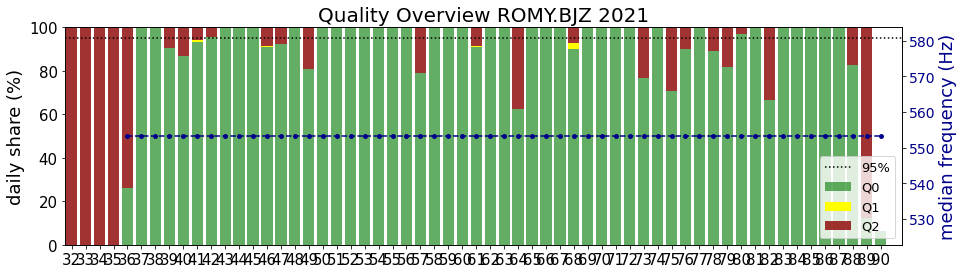

In [18]:

fig, ax = plt.subplots(1, 1, figsize=(15,4))

font=16

width=0.8
ax.bar(data.doy, q0p, width, color="forestgreen", alpha=0.7, label="Q0", edgecolor=None, aa=True)
ax.bar(data.doy, q1p, width,bottom=q0p, color="yellow", label="Q1", edgecolor=None, aa=True)
ax.bar(data.doy, q2p, width,bottom=q0p+q1p, color="darkred", alpha=0.8, label="Q2", edgecolor=None, aa=True)

# ax.plot(data.doy, data.bad_areas/data.Q2*100, zorder=1, color='black', ls='--', lw=0.8)


for gap in gaps:
    ax.bar(gap, 100, width=width, color="grey", alpha=0.3, zorder=2, aa=True)

# for no in no_data.doy:
#     ax.bar(no, 100, width=width, color="black", alpha=0.3, zorder=2, aa=True)

ax.set_ylim(0,100)
# ax.set_xticks(m_cum)
# ax.set_xticklabels(month_names, rotation=20)

ax.set_xticks(data.doy)
# ax.set_xticklabels(data.doy-304, rotation=40)


ax.axhline(95, color='black', ls=':', label="95%")

ax.set_ylabel("daily share (%)", fontsize=font+2)

ax.tick_params(axis='both', labelsize=font-1)

ax.set_title(f"Quality Overview ROMY.{cha} {year}", fontsize=font+4)

ax.legend(fontsize=font-3, loc="lower right")

ax.set_xlim(x1,x2)

# ax2.set_ylim(553.3,553.4)


ax2 = ax.twinx()

col2 = "darkblue"

ax2.scatter(data.doy, data.frequency_med, color=col2, s=15, label=r"f$_{median}$")
ax2.plot(data.doy, data.frequency_med, color=col2, ls='--')

ax2.tick_params(axis='both', labelsize=font-2, labelcolor=col2)
ax2.set_ylabel("median frequency (Hz)", fontsize=font+2, color=col2)


plt.show();

fig.savefig(path2plots+"figs/"+f"{year}_{cha}_statistics_overview_zoomin.png", format="png", dpi=300)

# Plot Sagnac Frequency

In [11]:

# ## remove NaN values
# count = sum([ 1 for f in data.frequency_med if isnan(f) ])
# print(f"{count} NaN found")

# data_sub = data[['doy','frequency_med']]
# data_sub = data_sub.dropna()



# ## _____________________
# ## Plotting


# fig, ax = plt.subplots(1, 1, figsize=(15,5))

# width = 1.0
# font = 16

# ax.scatter(data_sub.doy, data_sub.frequency_med, color='darkred', s=15)
# ax.plot(data_sub.doy, data_sub.frequency_med, color="darkred", ls='--')

# # ax.axhline(median(data_sub.frequency_med), color="purple", zorder=-1, label='median')
# ax.axhline(sgnc_freq[cha[-1]], color="purple",ls='--', zorder=-2, label=r'theo. df$_{sagnac}$: '+f'{sgnc_freq[cha[-1]]} Hz')

# ax.legend(loc="lower right", fontsize=font-3)

# ax.grid(ls='--', zorder=-2, color='darkgrey')


# ax.set_ylabel("daily Sagnac frequency (Hz)", fontsize=font+2)

# ax.set_xticks(m_cum)
# ax.set_xticklabels(month_names, rotation=20)

# ax.tick_params(axis='both', labelsize=font)

# ax.set_title(f"Quality Overview ROMY.{cha} {year}", fontsize=font+4)

# for gap in gaps:
#     ax.axvspan(gap-0.5, gap+0.5, color="grey", alpha=0.2, lw=0)
# for no in no_data.doy:
# #     ax.bar(no, 100, width=width, color="black", alpha=0.3, zorder=2, aa=True)
#     ax.axvspan(no-0.5, no+0.5, color="black", alpha=0.3, lw=0)

# ax.set_xlim(0.5, 90.5)


# plt.show();

# # fig.savefig(path+"figs/"+f"{year}_{cha}_statistics_frequency.png", format="png", dpi=300)

# Print Statistics

In [13]:

gap_days = array(gaps).size

gap_percent = round(gap_days / UTCDateTime(f"{year}-12-31").julday *100, 2)

not_full_days = data[data.total_samples != max_samples_per_day].count()[0]


In [14]:
days_in_year = UTCDateTime(f"{year}-12-31").julday 
maximum_samples_of_year  = max_samples_per_day * days_in_year
maximum_samples_of_year -= max_samples_per_day * gap_days 
maximum_samples_of_year -= max_samples_per_day * no_data.doy.count()

maximum_days_of_year = UTCDateTime(f"{year}-12-31").julday
maximum_days_of_year -= gap_days
maximum_days_of_year -= no_data.doy.count()


q0_percent = round(data.Q0.sum()/maximum_samples_of_year*100, 2)
q0_days = round(data.Q0.sum()/maximum_days_of_year,1)

q1_percent = round(data.Q1.sum()/maximum_samples_of_year*100, 2)
q1_days = round(data.Q1.sum()/maximum_days_of_year,1)

q2_percent = round(data.Q2.sum()/maximum_samples_of_year*100, 2)
q2_days = round(data.Q2.sum()/maximum_days_of_year,1)


In [15]:

perfect_days = data[data.Q0 >= data.total_samples * 0.99].count()[0]

good_days = data[data.Q0 >= data.total_samples * 0.95].count()[0]

bad_days = data[data.Q2 >= data.total_samples * 0.5].count()[0]

gone_days = data[data.Q2 >= data.total_samples * 0.99].count()[0]


In [16]:
if mode == "runy":
    code = "60s/20s"
elif mode == "runx":
    code = "180s/60s"
    
    
print(f"{year} {cha}: {code} \n")

print(f"total days with data:   {data.doy.count()} days ")

print(f"total days of {year}:   {days_in_year} days")

print(f"days with no data:   {no_data.doy.count()} days")

print(f"days with error:   {gap_days} days")

print(f"days < {total} samples:   {not_full_days} days \n")

print(f"Q0: {q0_percent} % ({q0_days} days)")
print(f"Q1: {q1_percent} % ({q1_days} days)")
print(f"Q2: {q2_percent} % ({q2_days} days) \n")

print(f"Q0 > 99%: {perfect_days} days")
print(f"Q0 > 95%: {good_days} days \n")
print(f"Q2 > 99%: {gone_days} days")
print(f"Q2 > 50%: {bad_days} days")


NameError: name 'code' is not defined

In [ ]:
# f = open(f"{path}{year}_{cha}_{mode}_statistics.txt", "w")

# f.write(f"{year} {cha} {mode}\n")

# f.write(f"gaps: {gap_percent}% ({gap_days} days)\n")

# f.write(f"days with less than {total} samples: {not_full_days} days\n")

# f.write(f"Q0: {q0_percent} % ({q0_days} days) \n")
# f.write(f"Q1: {q1_percent} % ({q1_days} days) \n")
# f.write(f"Q2: {q2_percent} % ({q2_days} days)\n")

# f.write(f"Q0 > 99%: {perfect_days} days \n")
# f.write(f"Q0 > 95%: {good_days} days\n")
# f.write(f"Q2 > 99%: {gone_days} days \n")
# f.write(f"Q2 > 50%: {bad_days} days \n")

# f.close()
